<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/Assignment1_Training_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment1. MNIST Digit Recogntion
이 과제에서는 손으로 쓴 숫자들의 이미지를 input으로 받아서 0~9 중 어느 숫자에 해당하는지를 분류하는 10-way Classification Problem을 풀어 볼 겁니다. 지금까지 실습은 가상의 인공 데이터셋이었다면 이번에는 real-world 데이터셋이니 좀 더 설레지 않나요?

pytorch 내에 이미 구현되어 있는 MNIST Dataset을 사용하여 데이터가 공급됩니다.
대신 여러분들은 Model을 짜고 올바르게 Loss Function을 활용하는 코드를 작성하는데 집중해주시길 바랍니다.

1. 현재 Linear Model만 구현이 되어 있습니다. MLP Model을 <code>2.Model Architecture</code> 부분에 구현해주세요.
2. MLP Model을 생성할 때 hidden unit 수와 hidden layer 수를 인풋으로 넣어주면 해당 값으로 MLP가 자동으로 생성되게 하는 코드를 구현해보세요.
    * hidden unit의 수와 hidden layer의 수를 인풋으로 넣어줄 수 있는가?
    * 해당 값으로 MLP가 자동으로 생성되게 만들어주는 코드가 있던가??
3. 다양한 hidden_unit과 hidden_layer 그리고 learning rate를 바꿔가면서 정확도의 변화를 알려주세요(이 때 모델이 고정되었다면 learning rate부터 바꿔가면서 튜닝해보세요. 차트나 표를 자유롭게 활용하여 결과를 보여주세요.
4. 실험했던 결과 중 Test Set에 대한 Accuracy가 가장 높았던 실험 조건과 그때의 Accuracy를 알려주세요!
    * 어느 조건이었을 때 Accuracy가 가장 높았는가?
    * 어떤 가설이 문제 해결에 있어서 가장 유효했던가?
5. 양식은 따로 없으며 이 주피터 노트북의 뒷부분에 추가로 1~4의 내용을 덧붙여서 정리하면 되겠습니다!
과제 시 도저히 해결할 수 없는 애러나 질문 사항은 제 깃허브의 Issue란에 새 이슈를 남겨주세요

## 1. Data Preparation
Data Set
$$X_{train} \in \mathcal{R}^{50000 \times 784}, Y_{train} \in \mathcal{Z}^{50000}$$
$$X_{val} \in \mathcal{R}^{10000 \times 784}, Y_{val} \in \mathcal{Z}^{10000}$$
$$X_{test} \in \mathcal{R}^{10000 \times 784}, Y_{test} \in \mathcal{Z}^{10000}$$

한가지 궁금한 점은... 내가알기로 전체 train data는 60,000인데... train, val, test를 합치면 7만이 되잖어?!

* Data Set
    * trainset: 
        * train_x: (50000, 784), train_y: (50000,)
        * val_x: (10000, 784), val_y: (10000,)
        * test_x: (10000, 784), test_y: (10000,) 

In [1]:
# pytorch 내에 이미 구현되어 있는 MNIST Dataset을 불러와 학습을 진행합니다

import torch
from torchvision import datasets, transforms  # torchvision datasets, transforms
import torch.nn as nn

batch_size = 128
train_dataset = datasets.MNIST('./data', train=True, download=True,
                               transform=transforms.Compose([
                                   transforms.ToTensor(),  # Tensor 변환
                                   transforms.Normalize((0.1307,), (0.3081,))  # 정규화
                               ]))
test_dataset = datasets.MNIST('/data', train=False, download=True,
                              transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081,))
                              ]))

# torch.utils.data.random_split()
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])  # torch.utils.data.random_split()
print(len(train_dataset), len(val_dataset), len(test_dataset))

# train, val, test loader 3가지를 만들어준다
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!




/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw
Processing...
Done!
50000 10000 10000







* Standalone-Deep Learning을 통해 정말 많이 배우고 있다...
* 그동안 이런 저런 지식들을 많이 주어 담았었는데... 정리되지 않았던 지식들이 정리되는 느낌이랄까...!
---
* 실제 데이터라면 Custom Dataset을 만들어주고
* Custom Data Loader를 구현해야한다
* 지난 실험에서는 이 부분을 직접하면서 많은 벽에 부딪혔었지만 그만큼 많은 성장을 하기도 했었지...!

In [13]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

## Inspecting Dataset

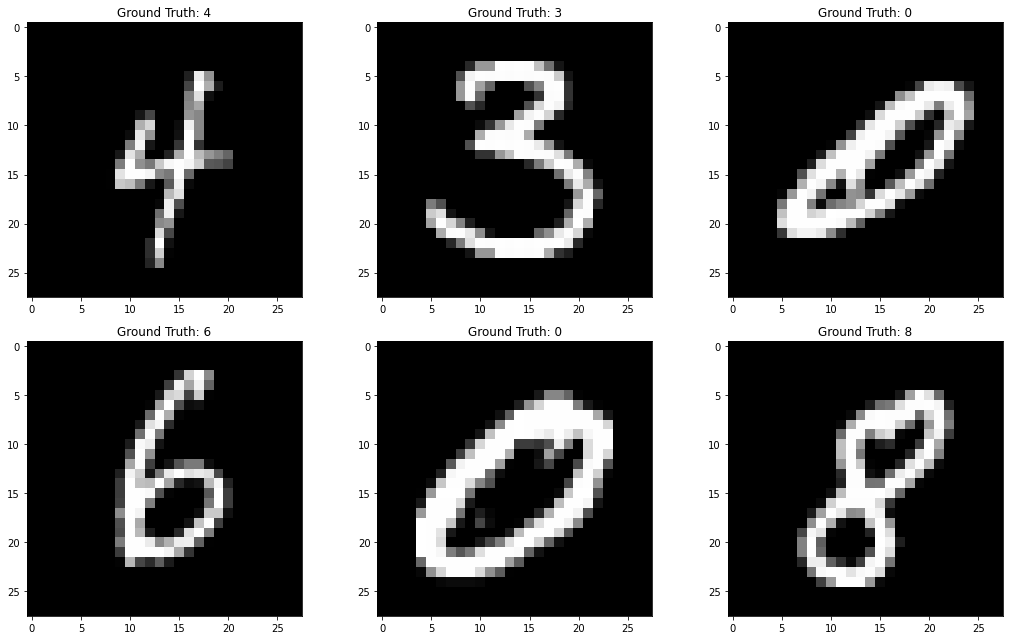

In [3]:
examples = enumerate(train_loader)
# print('next_example:', next(examples))
batch_idx, (example_data, example_targets) = next(examples)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
plt.show()

## 2. Model Architecture

In [4]:
class LinearModel(nn.Module):  # nn.Module 클래스를 상속
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=784, out_features=10, bias=True)

    def forward(self, x):
        x = self.linear(x)
        return x

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=28*28, out_features=500, bias=True)
        self.linear2 = nn.Linear(in_features=500, out_features=10)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

## 3. Cost Function Define (Loss Function Define)


In [5]:
cls_loss = nn.CrossEntropyLoss()

## 4. Train & Evaluation

In [6]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ======= Construct Model ======= #
model = LinearModel()
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ======= Construct Optimizer ======= #
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

# 본격적인 training전 list를 생성
list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):

    # ======= Train ======= #
    train_loss = 0
    model.train()  # model.train()
    optimizer.zero_grad()  # optimizer.zero_grad()

    for input_X, true_y in train_loader:
        input_X = input_X.squeeze()  # (1, 28, 28) to (28, 28)
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)
        # print(pred_y.shape, true_y.shape)
        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward()  # calc_gradient
        optimizer.step()
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)


    # ======= Validation ======= #
    val_loss = 0
    model.eval()
    optimizer.zero_grad()
    
    for input_X, true_y in val_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)
        # print('==================')
        # print('=== Debuggiing ===')
        # print(pred_y.shape, true_y.shape)
        loss = cls_loss(pred_y.squeeze(), true_y)
        val_loss += loss.detach().numpy()
    val_loss = val_loss / len(val_loader)
    list_val_loss.append(val_loss)

    # ======= Evaluation ======= #
    correct = 0
    model.eval()
    optimizer.zero_grad()

    for input_X, true_y in test_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
        correct += pred_y.eq(true_y).sum()


    # acc = accuracy_score(true_y, pred_y)
    acc = correct.numpy() / len(test_loader.dataset)
    list_acc.append(acc)
    list_acc_epoch.append(i)

    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {} %'.format(i, train_loss, val_loss, acc*100))


Number of 7850 parameters
Epoch: 0, Train Loss: 1.5724686340374106, Val Loss: 2.197256052795845, Test Acc: 88.98 %
Epoch: 1, Train Loss: 1.8908570365375266, Val Loss: 1.9370151795918429, Test Acc: 87.45 %
Epoch: 2, Train Loss: 1.4331671251055529, Val Loss: 1.7057364794272412, Test Acc: 88.24 %
Epoch: 3, Train Loss: 1.36556010676162, Val Loss: 1.6627351271955273, Test Acc: 87.92 %
Epoch: 4, Train Loss: 1.240875943694883, Val Loss: 1.926326231111454, Test Acc: 86.41 %
Epoch: 5, Train Loss: 1.372090588369028, Val Loss: 1.844183000582683, Test Acc: 86.61999999999999 %
Epoch: 6, Train Loss: 1.3503650856749785, Val Loss: 2.085228109661537, Test Acc: 87.11 %
Epoch: 7, Train Loss: 1.5392580076556681, Val Loss: 2.1921797711637954, Test Acc: 86.0 %
Epoch: 8, Train Loss: 1.6511912085973393, Val Loss: 2.6482401392127892, Test Acc: 85.55 %
Epoch: 9, Train Loss: 1.8160499268785462, Val Loss: 2.235891538330271, Test Acc: 86.36 %
Epoch: 10, Train Loss: 1.614374094988074, Val Loss: 2.3511655262753934, 

## 5. Report Experiment


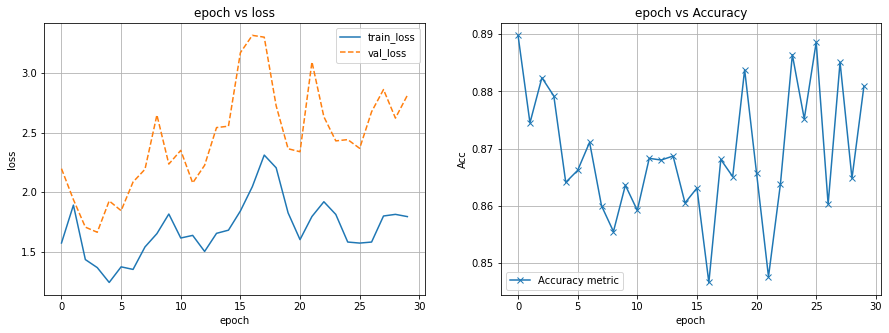

In [7]:
fig = plt.figure(figsize=(15, 5))

# ======= Loss Fluctuation ======= #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ======= Metric Fluctuation ======= # 
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()


## Exp02. MLP Model

In [8]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ======= Construct Model ======= #
model = MLPModel()
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ======= Construct Optimizer ======= #
lr = 0.005
optimizer = optim.Adam(model.parameters(), lr=lr)

list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):

    # ======= Train ======= #
    train_loss = 0
    model.train()  # model.train()
    optimizer.zero_grad()  # optimizer.zero_grad()

    for input_X, true_y in train_loader:
        input_X = input_X.squeeze()  # (1, 28, 28) to (28, 28)
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)
        # print(pred_y.shape, true_y.shape)
        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward()  # calc_gradient
        optimizer.step()
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)


    # ======= Validation ======= #
    val_loss = 0
    model.eval()
    optimizer.zero_grad()
    
    for input_X, true_y in val_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)
        # print('==================')
        # print('=== Debuggiing ===')
        # print(pred_y.shape, true_y.shape)
        loss = cls_loss(pred_y.squeeze(), true_y)
        val_loss += loss.detach().numpy()
    val_loss = val_loss / len(val_loader)
    list_val_loss.append(val_loss)

    # ======= Evaluation ======= #
    correct = 0
    model.eval()
    optimizer.zero_grad()

    for input_X, true_y in test_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
        correct += pred_y.eq(true_y).sum()


    acc = accuracy_score(true_y, pred_y)
    # acc = correct.numpy() / len(test_loader.dataset)
    list_acc.append(acc)
    list_acc_epoch.append(i)

    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {} %'.format(i, train_loss, val_loss, acc*100))


Number of 397510 parameters
Epoch: 0, Train Loss: 3.4486998447676753, Val Loss: 2.1105534653120404, Test Acc: 31.25 %
Epoch: 1, Train Loss: 2.134368314767433, Val Loss: 2.3841533691068237, Test Acc: 25.0 %
Epoch: 2, Train Loss: 2.119002609606594, Val Loss: 2.118001133580751, Test Acc: 18.75 %
Epoch: 3, Train Loss: 2.1240362556998993, Val Loss: 2.208584358420553, Test Acc: 18.75 %
Epoch: 4, Train Loss: 2.15736163638132, Val Loss: 2.4265350525892235, Test Acc: 31.25 %
Epoch: 5, Train Loss: 2.1050314830087333, Val Loss: 2.3347399778003934, Test Acc: 6.25 %
Epoch: 6, Train Loss: 2.249199071198778, Val Loss: 2.2315324680714665, Test Acc: 12.5 %
Epoch: 7, Train Loss: 2.184146448779289, Val Loss: 2.346178273611431, Test Acc: 18.75 %
Epoch: 8, Train Loss: 2.1799447938914187, Val Loss: 2.1469074034992652, Test Acc: 31.25 %
Epoch: 9, Train Loss: 2.0824228567845378, Val Loss: 2.177397595176214, Test Acc: 31.25 %
Epoch: 10, Train Loss: 2.241328514445468, Val Loss: 2.2030872287629526, Test Acc: 18.

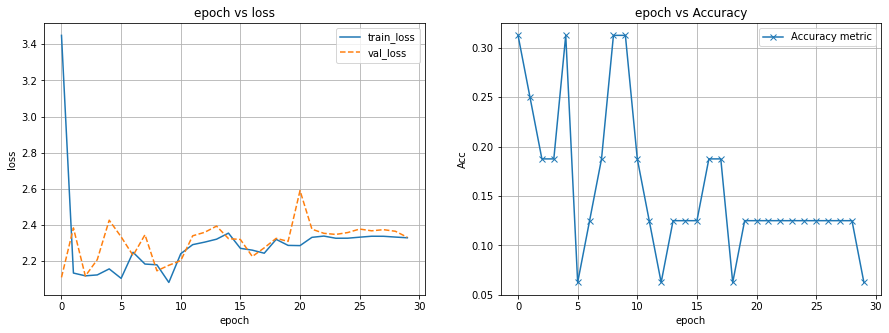

In [9]:
fig = plt.figure(figsize=(15, 5))

# ======= Loss Fluctuation ======= #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ======= Metric Fluctuation ======= # 
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()


## Exp03. Build CNN 
* CNN을 한 번 만들어 봅시다!
* 역시 Tutorial은 AlexNet이죠?

Build CNN Architecture


In [29]:
# make CNN Class
# reference: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)  # 입력 채널 수, 출력 채널 수, 필터의 크기
        self.conv2 = nn.Conv2d(6, 16, 3) # 입력 채널 수, 출력 채널 수 , 필터의 크기

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [31]:
# import torch.optim as optim
from sklearn.metrics import accuracy_score

# ======= Construct Model ======= #
model = Net()
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ======= Construct Optimizer ======= #
lr = 0.005
optimizer = optim.Adam(model.parameters(), lr=lr)

list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):

    # ======= Train ======= #
    train_loss = 0
    model.train()  # model.train()
    optimizer.zero_grad()  # optimizer.zero_grad()

    for input_X, true_y in train_loader:
        # print(input_X.shape)
        # input_X = input_X.squeeze()  # (1, 28, 28) to (28, 28)
        # input_X = input_X.view(-1, 784)
        pred_y = model(input_X)
        print(pred_y.shape)
        # print(pred_y.shape, true_y.shape)
        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward()  # calc_gradient
        optimizer.step()
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)


    # ======= Validation ======= #
    val_loss = 0
    model.eval()
    optimizer.zero_grad()
    
    for input_X, true_y in val_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)
        # print('==================')
        # print('=== Debuggiing ===')
        # print(pred_y.shape, true_y.shape)
        loss = cls_loss(pred_y.squeeze(), true_y)
        val_loss += loss.detach().numpy()
    val_loss = val_loss / len(val_loader)
    list_val_loss.append(val_loss)

    # ======= Evaluation ======= #
    correct = 0
    model.eval()
    optimizer.zero_grad()

    for input_X, true_y in test_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
        correct += pred_y.eq(true_y).sum()


    acc = accuracy_score(true_y, pred_y)
    # acc = correct.numpy() / len(test_loader.dataset)
    list_acc.append(acc)
    list_acc_epoch.append(i)

    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {} %'.format(i, train_loss, val_loss, acc*100))


Number of 60074 parameters
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch.Size([128, 10])
torch

RuntimeError: ignored